In [10]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple,List

In [11]:
plt.rcParams["figure.figsize"] = (15,15)
Line = Tuple[np.ndarray,np.ndarray]

In [12]:
theta=2*np.pi /360 * 60

In [13]:
def calc(line:Line,n:int,N:int)-> List[Line]:
    if n == N:        
        return [line]
    else:
        n += 1
        p1 = line[0]
        p5 = line[1]
        p2=(2 * p1 + p5)/3
        p4=(p1 + 2 * p5)/3
        
        p3=np.array([[np.cos(theta),-np.sin(theta)],
                 [np.sin(theta),np.cos(theta)]])@(p5-p1)/3 + p2

        line1 :Line = (p1,p2)
        line2 :Line = (p2,p3)
        line3 :Line = (p3,p4)
        line4 :Line = (p4,p5)
        
        return calc(line1,n,N) +calc(line2,n,N) +calc(line3,n,N) +calc(line4,n,N)

In [14]:
%%time
p1=np.array([0.1,0.3])
p5=np.array([0.9,0.3])
line : Line= (p1,p5)
n=0
N=10
line_list=calc(line,n,N)

Wall time: 4.78 s


In [15]:
len(line_list)

1048576

(0.0, 1.0)

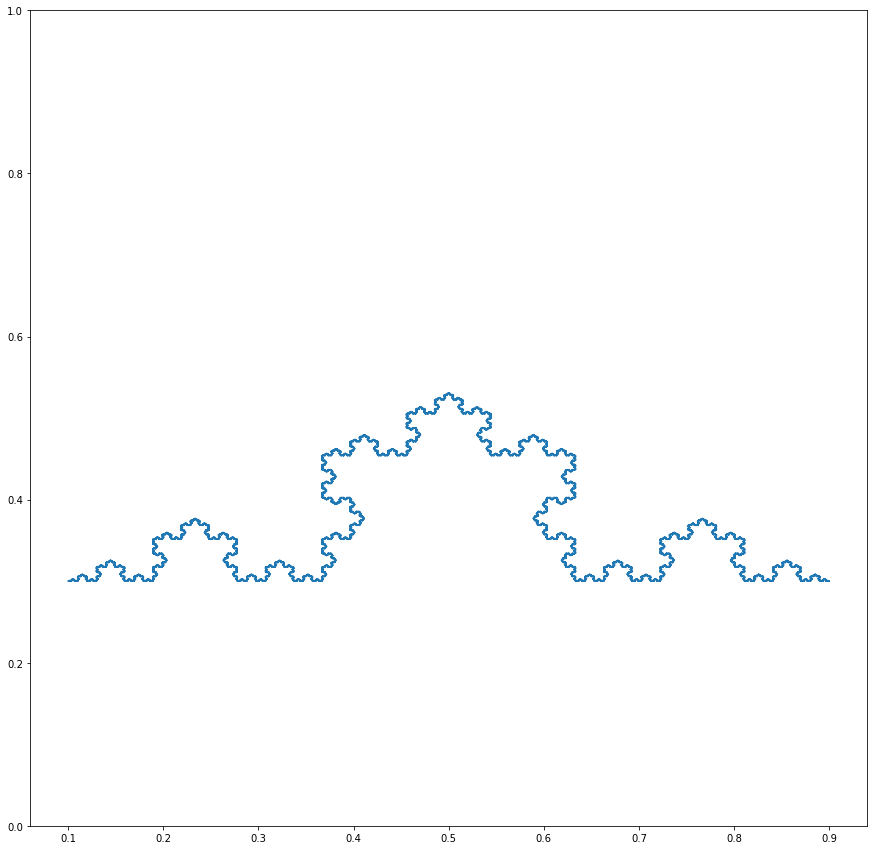

In [16]:
l=list()
for line in line_list:
    l.append(line[0])
l.append(line[1])

plt.plot(np.array(l)[:,0],np.array(l)[:,1])
#plt.scatter(np.array(l)[:,0],np.array(l)[:,1])
plt.ylim(0,1)